## 1-D Convolution

In [0]:
import numpy as np

In [0]:
x = [2,5,7,10,1]
kernel = [5,5]

In [0]:
np.convolve(x, kernel, mode='valid')

array([35, 60, 85, 55])

In [0]:
np.convolve(x, kernel, mode='same')

array([10, 35, 60, 85, 55])

## 2-D Convolution

In [0]:
kernel_size = 5
sigma = 1

In [0]:
gaussian_size = kernel_size//2

gaussian_size

2

In [0]:
rows = []
for i in range(-gaussian_size, gaussian_size+1):
  columns= []
  for k in range(-gaussian_size, gaussian_size+1):
    columns.append((i**2 + k**2) / 2 * sigma ** 2)
  rows.append(columns)


In [0]:
gaussian = np.exp(-np.array(rows))
gaussian

array([[0.01831564, 0.082085  , 0.13533528, 0.082085  , 0.01831564],
       [0.082085  , 0.36787944, 0.60653066, 0.36787944, 0.082085  ],
       [0.13533528, 0.60653066, 1.        , 0.60653066, 0.13533528],
       [0.082085  , 0.36787944, 0.60653066, 0.36787944, 0.082085  ],
       [0.01831564, 0.082085  , 0.13533528, 0.082085  , 0.01831564]])

In [0]:
gaussian = gaussian / (np.pi * sigma ** 2)
gaussian

array([[0.00583005, 0.02612847, 0.04307856, 0.02612847, 0.00583005],
       [0.02612847, 0.11709966, 0.19306471, 0.11709966, 0.02612847],
       [0.04307856, 0.19306471, 0.31830989, 0.19306471, 0.04307856],
       [0.02612847, 0.11709966, 0.19306471, 0.11709966, 0.02612847],
       [0.00583005, 0.02612847, 0.04307856, 0.02612847, 0.00583005]])

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png

--2019-11-30 02:47:59--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30128 (29K) [image/png]
Saving to: ‘487px-OpenCV_Logo_with_text.png.1’

487px-OpenCV_Logo_w 100%[===================>]  29.42K  --.-KB/s    in 0.005s  

2019-11-30 02:47:59 (6.21 MB/s) - ‘487px-OpenCV_Logo_with_text.png.1’ saved [30128/30128]



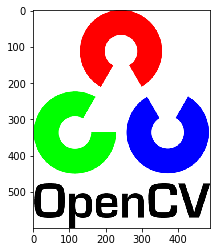

In [0]:
from skimage import io

img = io.imread('487px-OpenCV_Logo_with_text.png')
img.shape

import matplotlib.pyplot as plt

plt.imshow(img)

In [0]:
gaussian.shape

(5, 5)

In [0]:
stride = 1
size_padding_left = int(np.floor(kernel_size - stride) /2)
size_padding_right = int(np.floor(kernel_size - stride) /2)

size_padding_left, size_padding_right

(2, 2)

In [0]:
img.shape

(600, 487, 4)

In [0]:
img_padded = np.pad(img, ((size_padding_left, size_padding_right), (size_padding_left, size_padding_right),
            (0,0)), mode='constant')
img.shape, img_padded.shape

((600, 487, 4), (604, 491, 4))

In [0]:
img_padded[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [0]:
output = np.zeros(img.shape)
# output

In [0]:
for z in range(img_padded.shape[2]):
  for y in range(int((img_padded.shape[0] - kernel_size) / stride + 1)):
    for x in range(int((img_padded.shape[1] - kernel_size) / stride + 1)):
      cut = img_padded[y * stride: y * stride + kernel_size, 
                 x * stride: x * stride + kernel_size, z]
      cut = (cut * gaussian).sum()
      output[y, x, z] = cut 

In [0]:
output.shape

(600, 487, 4)

In [0]:
output

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [0]:
output.max()

500.7255281377309

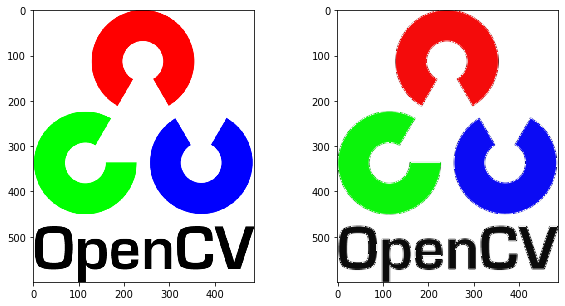

In [0]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(output.astype('uint8'))
